## Movie's inflation rating
The project is about the fact that in the Fandango's platform, the ratings are higher than the actual values (because they rounded the value to the top value and not the lowest one for example, 4.1 to 4.5). 
In this project, we'll analyze more recent movie ratings to determine wheter there has been any change in  Fandango's rating system after Hickey's analysis.

In [79]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
import matplotlib.style as style
style.available
%matplotlib inline
prev_data=pd.read_csv("fandango_score_comparison.csv")
rec_data=pd.read_csv("movie_ratings_16_17.csv")

In [80]:
prev_data=prev_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
rec_data=rec_data[['movie', 'year', 'fandango']]

In [81]:
prev_data.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [82]:
rec_data.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [83]:
prev_data["Fandango_votes"].value_counts().sort_index()

35       1
36       1
38       2
41       2
42       1
43       2
46       1
48       1
50       1
51       1
54       1
55       1
56       1
59       1
63       1
64       1
66       2
70       1
74       1
79       1
83       2
95       1
99       1
110      1
118      1
121      1
124      1
127      1
162      1
192      1
        ..
6288     1
6437     1
6506     1
6757     1
6835     1
7025     1
7123     1
7705     1
8055     1
8077     1
8096     1
8357     1
8381     1
9363     1
9418     1
9443     1
9749     1
10509    1
12055    1
12640    1
13055    1
14846    1
14998    1
15205    1
15337    1
15749    1
33538    1
34085    1
34390    1
34846    1
Name: Fandango_votes, Length: 140, dtype: int64

One way to determine on the other dataset if there are movies with less than 30 fan ratings, it's to double check on Fandango website some movies and see if the majority of it has more than 30 fan ratings.

In [84]:
rec_data.sample(10)

,movie,year,fandango
167,The Choice,2016,4.0
106,Max Steel,2016,3.5
150,Storks,2016,4.5
85,John Wick: Chapter 2,2017,4.5
113,Miss Peregrine's Home for Peculiar Children,2016,4.0
120,Neighbors 2: Sorority Rising,2016,3.5
196,The Space Between Us,2017,4.0
83,Jane Got a Gun,2016,3.5
56,Fist Fight,2017,3.5
125,Now You See Me 2,2016,4.0


In [85]:
prev_data["Year"]=prev_data["FILM"].str[-5:-1]

In [86]:
prev_data.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [87]:
prev_data1=prev_data[prev_data["Year"]=="2015"]
prev_data1.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [88]:
rec_data1=rec_data[rec_data["year"]==2016].copy()
rec_data1.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


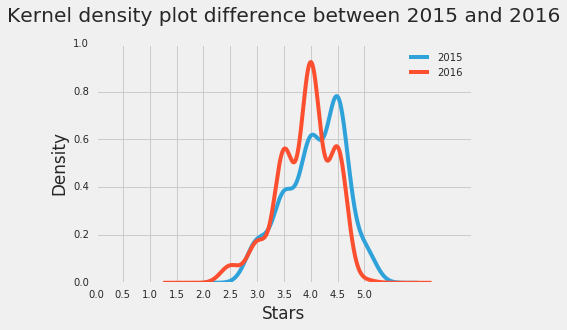

In [89]:
plt.style.use('fivethirtyeight')
prev_data1["Fandango_Stars"].plot.kde(label="2015", legend=True)
rec_data1["fandango"].plot.kde(label="2016", legend=True)
plt.title("Kernel density plot difference between 2015 and 2016", y=1.07)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel("Stars")
plt.show()


The ratings in 206 are slightly lower compared to 2015. They are high but as we can see, the difference between the two years is evident

In [90]:
prev_data1["Fandango_Stars"].value_counts().sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [91]:
rec_data1["fandango"].value_counts().sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [92]:
prev_data1["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [93]:
rec_data1["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The difference between the two years is clear, because there are more 4.5 and 5 ratings in 2015 compared to 2016. During 2016, the 3.5 and 4.0 are higher probably because there is a slight shift (after the analysis) to lower values. We should use the percetange because the number of movies is different between the two years


In [94]:
mean_2015=prev_data1["Fandango_Stars"].mean()
median_2015=prev_data1["Fandango_Stars"].median()
mode_2015=prev_data1["Fandango_Stars"].mode()[0]
print(mean_2015)
print(median_2015)
print(mode_2015)

4.0852713178294575
4.0
4.5


In [95]:
mean_2016=rec_data1["fandango"].mean()
median_2016=rec_data1["fandango"].median()
mode_2016=rec_data1["fandango"].mode()[0]
print(mean_2016)
print(median_2016)
print(mode_2016)

3.887434554973822
4.0
4.0


The difference is clear, the mean shows a 0.20 less in 2016 compared to 2015. The median is the same, even though the mode is 4.0 in 2016 (against 4.5 in 2015).

In [96]:
df=pd.DataFrame()
df["2015"]=[mean_2015, median_2015, mode_2015]
df["2016"]=[mean_2016, median_2016, mode_2016]
df.index=["mean", "median", "mode"]

In [97]:
df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


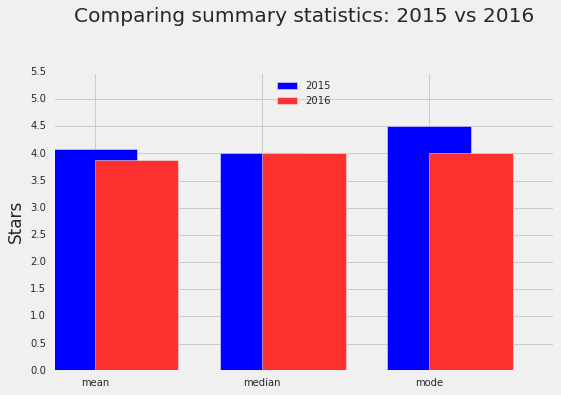

In [98]:
df["2015"].plot.bar(color="#0000FF",align="center", label="2015")
df["2016"].plot.bar(color="#FF3030", align="edge", label="2016", figsize = (8,5))
plt.title("Comparing summary statistics: 2015 vs 2016", y=1.15)
plt.yticks(arange(0,6,0.5))
plt.ylabel("Stars")
plt.legend(loc="upper center")
plt.show()

We can see that there is a difference between the two years, so it could be related to the fact that the platform solved the bug and now the ratings are more realistic. At least, looking at these insights. 